# Country choice: Mexico    , mi pais favorito

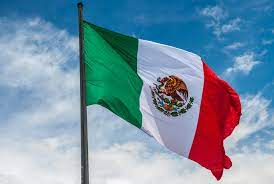



In [2]:
#@title Default title text
#installing all necessary dependencies 

import numpy as np
import scipy.optimize as opt
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import scipy.linalg as la
import numpy as np
from numpy.linalg import matrix_rank

import sympy as sym
from sympy import *
from sympy import symbols, Matrix, Transpose
from sympy import lambdify

import math
import cmath
from math import *

import mpmath as mp
from math import sqrt
from matplotlib import rcParams


# Inputing data for savings rate, capital output ratio and labor hours for Mexico to plot data plots


In [1]:

#timing 
time=[t for t in range(1970,2100)]

#Pop_growth: 

s_data = [0.194,0.177,0.181,0.191,0.196,0.192,0.189,0.208,0.208,0.223,0.223,0.217,0.225,0.258,0.233,0.225,0.177,0.216,0.208,0.199,0.194,0.182,0.16,0.191,0.2,0.185,0.175,0.179,0.173,0.175,0.161,0.142,0.144,0.193,0.211,0.202,0.215,0.214,0.208,0.199,0.203]

#K/Y: 

ky_data = np.array([1.3,1.413,1.449,1.452,1.52,1.61,1.582,1.677,1.676,1.674,1.679,1.676,1.508,1.851,1.943,1.828,1.803,1.786,2.186,2.183,2.134,2.101,2.098,2.151,1.986,2.213,2.243,2.165,2.183,2.196,2.263,2.437,2.494,2.57,2.544,2.562,2.517,2.519,2.588,2.898,2.802])

#labor hours: 

l_data = np.array([20.355,20.778,21.208,21.627,22.035,22.685,22.889,23.076,23.406,24.057,24.719,24.785,24.878,24.24,24.474,24.847,24.792,24.813,24.859,24.995,25.127,24.447,24.5,24.79,25.398,24.75,25.529,26.979,26.208,26.836,26.065,25.3,26.028,25.164,25.35,25.777,25.551,25.234,25.816,23.924,25.908])



NameError: ignored

# **Working on the model ** 

In [ ]:
# Set parameter values

# Iteration parameters
S = 100 # number of periods in the shooting
niter=200 # number of possible trials of the intial value
epsilon=.00005 #convergence criterion

# Model Parameters
theta = 0.3 # Share of capital in output rents
delta = 0.035 # Capital depreciation rate
alpha = 3.1 # disutility from labor parameter
beta = 0.946 # Discount factor
T = 3.9*24 # Total number of hours owned in a week

In [ ]:
# In the guess of the initial consumption, we will feed in the actual time series of the exogenous variables 
# Population and TFP grow at exogenous rate
# Capital taxes are 0.2 in the first 20 years and then 0.12 forever
# Government spending share fluctuates around 0.13 (where error is normally distribution with mean 0 and sd 0.0005) for the first 20 years
# In the long run, government spending share is constant


gamma = 1.001 # TFP to the power 1/(1-theta) growth rate. Long run growth rate of per capita income 
gA_ast = gamma**(1-theta) # = (1+g) in our model. TFP growth rate
n_ast = 1.020 # population growth rate. n_ast = (1+n) in our model

chi_ast = 0.107 # long-run government share
tau_ast = 0.084 # long-run capital tax

##

##Check the sources of the following parameters and how they calculated them: 

##

H0 = 22127*1000000/52
N0 = 25654920
k0 = 1.95**(1/(1-theta))*(H0/N0)
A0 = 1**(1-theta)

In [ ]:
# SS- Steady State
c1 = theta*(1/(1-tau_ast)*(gA_ast**(1/(1-theta))/beta - 1)+ delta)**(-1) # steady state (k/h)**(1-theta)
c2 = 1 - chi_ast - c1*(gA_ast**(1/(1-theta))*n_ast - 1 + delta)  # steady state c/y ratio
c3 = c2*alpha/(1-theta) # steady state (barh - h)/h
h_ast = 1/(1+c3)*T
k_ast = c1**(1/(1-theta))*h_ast
y_ast = k_ast**theta*h_ast**(1-theta)
c_ast = c2*y_ast

print("[k_ast, c_ast, h_ast] = ", k_ast, c_ast, h_ast)

[k_ast, c_ast, h_ast] =  109.4716511015576 25.95525388038508 22.29159035940587


In [ ]:
# Inputting series of exogenous variables 

#timing 

time = 100

# defining variables over time 

chi =[1]*time 
tau =[1]*time
gt  =[1]*time
nt  =[1]*time



#chi_tt =np.array([0.05128205128,0.1136363636,0.05376344086,0,0.1226415094,0.06194690265,-0.01801801802,0.008928571429,0,-0.07692307692,0.07142857143,0.008849557522,-0.2021276596,0.04081632653,-0.01030927835,0,-0.05434782609,-0.04545454545,-0.02325581395,0.01149425287,0.06451612903,0.08823529412,0.2330827068,-0.0390625,0.06569343066,-0.06201550388,-0.06611570248,-0.01680672269,-0.01709401709,-0.01739130435,0.008620689655,0.008547008547,-0.01739130435,-0.06481481481,0.009174311927,-0.009259259259,0,0.02702702703,0.09016393443,-0.03389830508]),
#tau_ast  = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-3.059405941,0,0,0,0,0,-0.05208333333,-0.2631578947,-0.08571428571,0.1025641026,0.03703703704,0.05813953488,0.01149425287,0.06451612903,-0.1204819277,-0.1216216216,-0.1384615385,0.01515151515,0.04347826087,0.06756756757,0.03896103896,0.0253164557,0.0125])
#gA_ast   = np.array([-0.04775657236,0.01870605515,0.02767060001,-0.01228658208,-0.02944335504,0.008092279059,-0.03257884483,0.03264937749,0.02927819843,0.01777221813,0.04772793558,0.00621966604,-0.1367506783,-0.02954874869,-0.0008371470768,-0.05926115541,-0.01379724119,-0.1151531636,0.004046760459,0.006944048896,0.02952848157,0.0006797218319,-0.001796032284,0.06658728305,-0.06645780551,0.01314596532,0.02735068795,0.01180369654,-0.01875648437,0.01723391664,-0.02258941881,0.006763970741,-0.01936418702,0.00879879299,0.01002316835,0.01921003344,0.0003104206106,-0.01792552347,-0.08240297309,0.04720472149,])
#s_data = [0.194,0.177,0.181,0.191,0.196,0.192,0.189,0.208,0.208,0.223,0.223,0.217,0.225,0.258,0.233,0.225,0.177,0.216,0.208,0.199,0.194,0.182,0.16,0.191,0.2,0.185,0.175,0.179,0.173,0.175,0.161,0.142,0.144,0.193,0.211,0.202,0.215,0.214,0.208,0.199,0.203]
#gA_ast = np.array([1.0000,  0.9544 ,  0.9726 ,  1.0003 ,  0.9882 ,  0.9599 ,  0.9677 ,  0.9372 ,  0.9688 ,  0.9980 ,  1.0161 ,  1.0670 ,  1.0737 ,  0.9445 ,  0.9174 ,  0.9167 ,  0.8654 ,  0.8536 ,  0.7655 ,  0.7686 ,  0.7739 ,  0.7975 ,  0.7980 ,  0.7966 ,  0.8534 ,  0.8002 ,  0.8109 ,  0.8337 ,  0.8437 ,  0.8281 ,  0.8427 ,  0.8240 ,  0.8297 ,  0.8139 ,  0.8211 ,  0.8294 ,  0.8457 ,  0.8459 ,  0.8310 ,  0.7678 ,  0.8058 ])



# Trajectory of Exogenous Variables


chi_ast  = np.array([0.074,0.078,0.088,0.093,0.093,0.106,0.113,0.111,0.112,0.112,0.104,0.112,0.113,0.094,0.098,0.097,0.097,0.092,0.088,0.086,0.087,0.093,0.102,0.133,0.128,0.137,0.129,0.121,0.119,0.117,0.115,0.116,0.117,0.115,0.108,0.109,0.108,0.108,0.111,0.122,0.118])

tau_ast  = np.array([0.41,0.41,0.41,0.41,0.41,0.41,0.41,0.41,0.41,0.41,0.41,0.41,0.41,0.41,0.41,0.41,0.41,0.41,0.101,0.101,0.101,0.101,0.101,0.101,0.096,0.076,0.07,0.078,0.081,0.086,0.087,0.093,0.083,0.074,0.065,0.066,0.069,0.074,0.077,0.079,0.08])

n_ast    = np.array([1.032,1.032,1.033,1.034,1.03,1.032,1.033,1.033,1.031,1.034,1.032,1.031,1.031,1.033,1.034,1.035,1.035,1.034,1.032,1.03,1.03,1.029,1.028,1.026,1.025,1.024,1.023,1.022,1.022,1.02,1.019,1.018,1.017,1.018,1.02,1.021,1.022,1.022,1.022,1.022,1.021])

gA_ast   = np.array([1,0.9678715503,1.013306006,1.019836632,0.9914882317,0.9798921573,1.005703845,0.977808355,1.023508041,1.021018595,1.012631541,1.03482585,1.004376913,0.9141855336,0.979821939,0.9994144137,0.9605011021,0.9904538089,0.9265435465,1.002842512,1.004889705,1.021202911,1.00047608,0.9987446936,1.049417738,0.9559593514,1.009306233,1.019601818,1.008346378,0.987076312,1.012243247,0.9844849781,1.004762168,0.9866643574,1.006205587,1.007076538,1.013670458,1.000217352,0.9876402875,0.9460796837,1.034428036])


#taking care of steady states/ long term values: 

# 1. chi[t]:
for i in range(0, time):
    
    if i < len(chi_ast):
        chi[i] = chi_ast[i]
    else:
        chi[i] = chi_ast[len(chi_ast)-1]
# 2.tau[t]:
for i in range(0, time):
    
    if i < len(tau_ast):
        tau[i] = tau_ast[i]
    else:
        tau[i] = tau_ast[len(tau_ast)-1]

# 3. gt[t]:
for i in range(0, time):
    
    if i < len(gA_ast):
        gt[i] = gA_ast[i]
    else:
        gt[i] = gA_ast[len(gA_ast)-1]

# 4. nt[t]:
for i in range(0, time):
    
    if i < len(n_ast):
        nt[i] = n_ast[i]
    else:
        nt[i] = n_ast[len(n_ast)-1]

#verifying if they fit time value: 

print(len(chi))
print(chi)

print(len(tau))
print(tau)

print(len(gt))
print(gt)

print(len(nt))
print(nt)

# Plot of Exogenous Variables
#Check plots on the last graph 

100
[0.074, 0.078, 0.088, 0.093, 0.093, 0.106, 0.113, 0.111, 0.112, 0.112, 0.104, 0.112, 0.113, 0.094, 0.098, 0.097, 0.097, 0.092, 0.088, 0.086, 0.087, 0.093, 0.102, 0.133, 0.128, 0.137, 0.129, 0.121, 0.119, 0.117, 0.115, 0.116, 0.117, 0.115, 0.108, 0.109, 0.108, 0.108, 0.111, 0.122, 0.118, 0.118, 0.118, 0.118, 0.118, 0.118, 0.118, 0.118, 0.118, 0.118, 0.118, 0.118, 0.118, 0.118, 0.118, 0.118, 0.118, 0.118, 0.118, 0.118, 0.118, 0.118, 0.118, 0.118, 0.118, 0.118, 0.118, 0.118, 0.118, 0.118, 0.118, 0.118, 0.118, 0.118, 0.118, 0.118, 0.118, 0.118, 0.118, 0.118, 0.118, 0.118, 0.118, 0.118, 0.118, 0.118, 0.118, 0.118, 0.118, 0.118, 0.118, 0.118, 0.118, 0.118, 0.118, 0.118, 0.118, 0.118, 0.118, 0.118]
100
[0.41, 0.41, 0.41, 0.41, 0.41, 0.41, 0.41, 0.41, 0.41, 0.41, 0.41, 0.41, 0.41, 0.41, 0.41, 0.41, 0.41, 0.41, 0.101, 0.101, 0.101, 0.101, 0.101, 0.101, 0.096, 0.076, 0.07, 0.078, 0.081, 0.086, 0.087, 0.093, 0.083, 0.074, 0.065, 0.066, 0.069, 0.074, 0.077, 0.079, 0.08, 0.08, 0.08, 0.08, 0.08,

In [ ]:
#  

# THE SHOOTING ALGORITHM 

#

#T = 5*24 # Total number of hours owned in a week

# Initial Conditions for capital

k = [k0]*(S)
c = [1]*(S)
h = [1]*(S)

#Initial condition for consumption
c_0_L = .12 *c_ast
c_0_H = 15 *c_ast


#Solve for k_t+1 and c_t+1 and h_t+1 until convergence along the saddle path

niter = 500
S = 100

flag  = 0

# k_t+1*(1+g)^(1/1-theta)*(1+n)=(1-chi_t)*(k_t^theta*h_t^(1-theta))-c_t+(1-delta)*k_t
#Start iteration
for j in range(0,niter):
    c[0] = (c_0_L+c_0_H)/2 #Initial guess for c_o
    #print(c_0_L , c_0_H, c[0])
    def func(x): 
        return T - alpha*c[0]/((1-theta))*(k[0]/x)**(-(theta)) - x #Consumption-Leisure choice

    root = fsolve(func, 15)   #check if I can increase from 15 to 20 
    h[0] = root[0]
    #print(k[0], c[0], h[0])
    
    #Generate paths for c and k given intitial guess for c_0
    for t in range(0,S-1):
        k[t+1] = (k[t]**theta*h[t]**(1-theta)*(1- chi[t]) +(1-delta)*k[t]-c[t])/(gt[t]**(1/(1-theta))*nt[t])
        #print(k[t+1])
        
        
        if k[t+1] < 0:
            flag = 1
            #print(flag)
            break
        if k[t+1]>2*k_ast:
            flag =2
            #print(flag)
            break
            
        def cfunc(z):
            # Solves for c_t+1 and h_t+1 simultaneously
            fc = z[0]
            fh = z[1]
            f1 = T - alpha*fc/((1-theta))*(k[t+1]/fh)**(-(theta)) - fh 
            f2 = fc/c[t] - beta/(gt[t]**(1/(1-theta)))*(1 + (1-tau[t+1])*(theta*(k[t+1]/fh)**(-(1-theta))-delta)) 
            return [f1, f2]
        
        sol = fsolve(cfunc, [15, 15])
        #print("anuradha", sol)
        c[t+1] = sol[0]
        h[t+1] = sol[1]
        
        # Check for convergence
        # Update the intitial value if not convergence
        if t== S-2:
            #print("anuradha",k[t+1], c[t+1], h[t+1])
            if (abs(k[S-1]-k_ast)/k_ast < epsilon) and abs((c[S-1] -c_ast)/c_ast < epsilon):
                flag = 10
                print( "Converged in iteration ", j)
                break
            # Update initial guess for c
            elif (k[S-1]-k_ast)/k_ast <=epsilon:
                flag =1
            elif (k[S-1] - k_ast)/k_ast >= epsilon:
                flag =2
        
        
    if flag == 1:
        c_0_H = c[0]
        #print("anuradha")
    elif flag == 2:
        c_0_L = c[0]
        #print("anuradha2")
    elif flag == 10:
        break
        


        #Ends iteration loop
        #End shooting algorithm if reached max number of iterations
    
if j == niter-1:
    print('Failure in Convergence!')
  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in power
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in double_scalars


Converged in iteration  47


In [ ]:
##

## Checking steady states and long term values equivalence: looks good 

##

t = S-2
print(k[t+1], c[t+1], h[t+1])
print([k_ast, c_ast, h_ast])
print(c[0])
print(h)


print(epsilon)
print((k[S-1]-k_ast)/k_ast <epsilon)
print((c[S-1]-c_ast)/c_ast <epsilon)
print((h[S-1]-h_ast)/h_ast)

109.46894590726568 19.085219200048517 34.05657463155685
[109.4716511015576, 25.95525388038508, 22.29159035940587]
18.939424965625754
[23.584572973054453, 23.55028833801707, 22.589921069942577, 22.887071046629117, 23.424185026357733, 23.263421768656496, 22.683306640437763, 22.831797078272533, 22.159105730391058, 22.86675758739466, 23.557650840441955, 24.168149067053513, 25.56466923781911, 26.231208947124617, 24.07265349899465, 23.994377125600444, 24.59233467424538, 23.98002466567967, 23.703942644855005, 21.43581890131839, 21.596767216309164, 21.797926748207402, 22.466466933143312, 22.486506543280157, 22.34492660224433, 23.673038251914228, 22.121483138146157, 22.258565867081426, 22.72372241324377, 22.863118332751437, 22.389773608968163, 22.709365966366374, 22.17944618804327, 22.253597479431527, 21.75385366715855, 21.833242325647017, 21.91007704348078, 22.164620132237214, 22.008759969691653, 21.449991948358925, 19.559120475288058, 20.229569001581915, 20.799932899733324, 21.280253949020672

In [ ]:
#Savings rate and K/Y

S= 41


A=[A0]*S
N=[N0]*S
C=[0]*S
K=[0]*S
Y=[0]*S
G=[0]*S
s=[0]*S
ky_ratio=[0]*S

#redefining 'n_ast' as a scalar so that N0 can be calculated:
n_ast = 1.020

for t in range(1,S):
  A[t]=A0*gamma**t
  N[t]=(N0*n_ast)**t

for t in range(S):
  C[t]=c[t]*A[t]*N[t]
  K[t]=k[t]*A[t]*N[t]
  Y[t]=(A[t]**(1-theta))*(K[t]**theta)*((h[t]*N[t])**(1-theta))
  G[t]=chi_t[t]*Y[t]
  s[t]=(Y[t]-G[t]-C[t])/Y[t]
  ky_ratio[t]=K[t]/Y[t]

# Plotting data and model plots 

[23.584572973054453, 23.55028833801707, 22.589921069942577, 22.887071046629117, 23.424185026357733, 23.263421768656496, 22.683306640437763, 22.831797078272533, 22.159105730391058, 22.86675758739466, 23.557650840441955, 24.168149067053513, 25.56466923781911, 26.231208947124617, 24.07265349899465, 23.994377125600444, 24.59233467424538, 23.98002466567967, 23.703942644855005, 21.43581890131839, 21.596767216309164, 21.797926748207402, 22.466466933143312, 22.486506543280157, 22.34492660224433, 23.673038251914228, 22.121483138146157, 22.258565867081426, 22.72372241324377, 22.863118332751437, 22.389773608968163, 22.709365966366374, 22.17944618804327, 22.253597479431527, 21.75385366715855, 21.833242325647017, 21.91007704348078, 22.164620132237214, 22.008759969691653, 21.449991948358925, 19.559120475288058, 20.229569001581915, 20.799932899733324, 21.280253949020672, 21.68132162791712, 22.013859635831775, 22.287984234942076, 22.512890040731662, 22.696707388884498, 22.846477926076883, 22.968204378

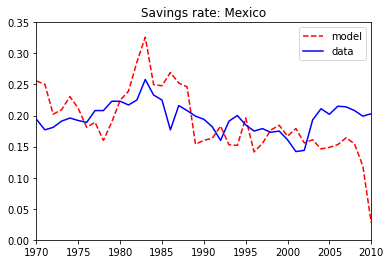

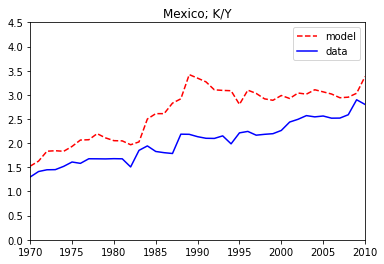

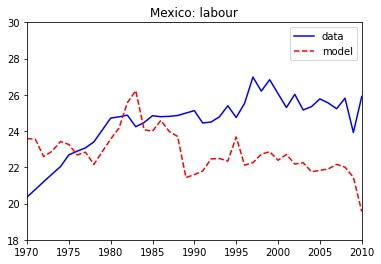

In [ ]:
# Plots

# Periods for the time-path in the graph
time=[t for t in range(1970,2070)]
ll = len(time)

#Re-introducing h[t] here for plotting: 
print(h)

#savings rate
plt.figure()
plt.plot(time[:41], s, 'r-',linestyle='dashed', label='model')
plt.plot(time[:41], s_data, 'b-', label='data')

plt.xlim(1970,2010)
plt.ylim(0, 0.35)
plt.title("Savings rate: Mexico")
plt.legend()
plt.show()

#savings rate
plt.figure()
plt.plot(time[:41], ky_ratio, 'r-',linestyle='dashed', label='model')
plt.plot(time[:41], ky_data, 'b-', label='data')
plt.xlim(1970,2010)
plt.ylim(0, 4.5)
plt.title("Mexico; K/Y")
plt.legend()
plt.show()

#labour hours plot 

plt.figure()
plt.plot(time[:41], l_data, 'b-', label='data')
plt.plot(time[:41], h[0:41], 'r-', linestyle='dashed', label='model')
plt.xlim(1970,2010)
plt.ylim(18, 30)
plt.title("Mexico: labour")
plt.legend()
plt.show()



# The model for labor is highly dependent on the value of T which is unknown for Mexico! I kept it at T=3.9 to have this plot



# Question 2: Plotting counterfactuals for Mexico

# Savings rate in  Mexico and analyzing TFP

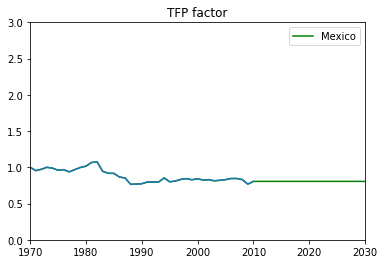

In [ ]:
#Re-introduction of TFP factor data: normalized just for plotting 


A_data = np.array([1.0000,  0.9544 ,  0.9726 ,  1.0003 ,  0.9882 ,  0.9599 ,  0.9677 ,  0.9372 ,  0.9688 ,  0.9980 ,  1.0161 ,  1.0670 ,  1.0737 ,  0.9445 ,  0.9174 ,  0.9167 ,  0.8654 ,  0.8536 ,  0.7655 ,  0.7686 ,  0.7739 ,  0.7975 ,  0.7980 ,  0.7966 ,  0.8534 ,  0.8002 ,  0.8109 ,  0.8337 ,  0.8437 ,  0.8281 ,  0.8427 ,  0.8240 ,  0.8297 ,  0.8139 ,  0.8211 ,  0.8294 ,  0.8457 ,  0.8459 ,  0.8310 ,  0.7678 ,  0.8058 ])
A = [1]*(len(time)) # Model A

for i in range(0, len(time)):
   
    if i < len(A_data):
        A[i] = A_data[i]
    else:
        A[i] = A_data[len(A_data)-1]

plt.figure()
plt.plot(time, A, 'g-', label='Mexico')
plt.plot(time[:41], A_data[0:41])
plt.xlim(1970,2030)
plt.ylim(0,3)
plt.title("TFP factor")
plt.legend()
plt.show()


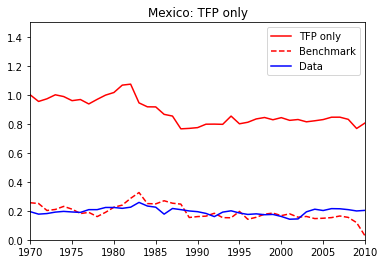

In [ ]:
# Plot dynamics of normalized c, h, k and savings rate

# Periods for the time-path in the graph
time=[t for t in range(1970,2100)]

#plotting 
plt.plot(time[:41], A_data, '-r', label='TFP only')   #TFP growth from series 
plt.plot(time[:41], s, 'r-', label='Benchmark', linestyle='dashed')  #Savings rate from the model 
plt.plot(time[:41], s_data, 'b-', label='Data')   #Savings rate from series 

plt.xlim(1970,2010)
plt.ylim(0,1.5)
plt.title("Mexico: TFP only")
plt.legend()
plt.show()





# Bear with the scaling of this graph. All individual graphs are correct, but it may look off because savings rate and TFP for Mexico have really distant values. There was no model to refer to as a counterfactual plot.